In [20]:
import pandas as pd
from bunkatech.semantics.origami import Origami
import bamboolib
pd.options.mode.chained_assignment = None

import numpy as np
import random

data = pd.read_csv(
    "/Users/charlesdedampierre/Desktop/ENS Projects/imaginary-world/db_film_iw (2).csv",
    index_col=[0],
)

In [2]:
# All the basic components to compute before more specialized computation
origami = Origami(data = data,
                    text_var = 'description',
                    index_var = 'imdb',
                    extract_terms=True,
                    terms_embedding=True,
                    docs_embedding=False,
                    sample_size_terms=500,
                    terms_limit=500,
                    terms_ents=True,
                    terms_ngrams=(1, 2),
                    terms_ncs=True,
                    terms_include_pos=["NOUN", "PROPN", "ADJ"],
                    terms_include_types=["PERSON", "ORG"],
                    terms_embedding_model="distiluse-base-multilingual-cased-v1",
                    docs_embedding_model="tfidf",
                    language="en",
                    terms_path=None,
                    terms_embeddings_path=None,
                    docs_embeddings_path=None)

Extract Terms: 100%|███████████████████████████████████████████████████| 500/500 [00:05<00:00, 85.02it/s]


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

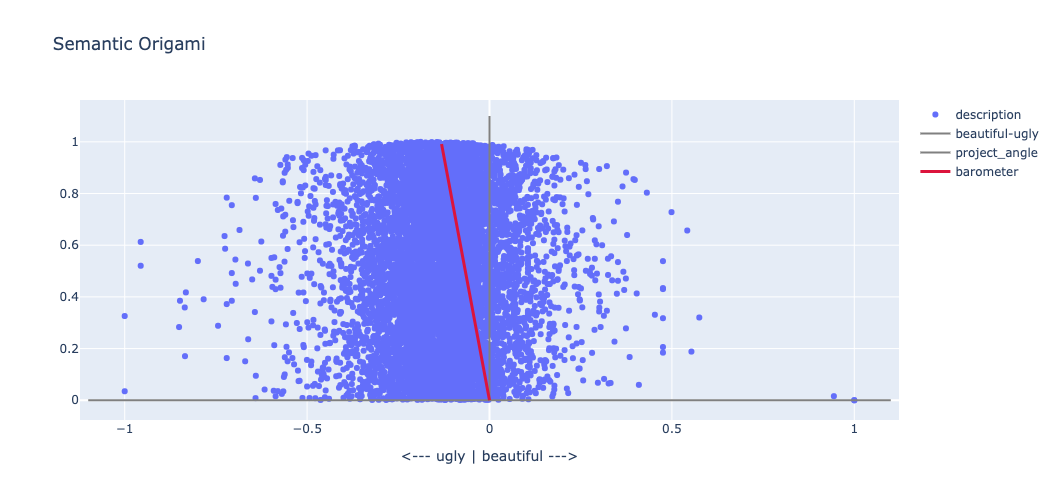

In [16]:
origami.origami_projection_unique(
        projection_1 = ['beautiful', 'ugly'],
        height = 500,
        width= 1000,
        type="documents",
        dispersion=True,
        barometer=True)

In [17]:
fig = origami.origami_projection(projection_1=['ugly', 'beautiful'],
                                projection_2 = ['young', 'old'],
                                height = 1000,
                                width = 1000,
                                regression=True,
                                type="documents")

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

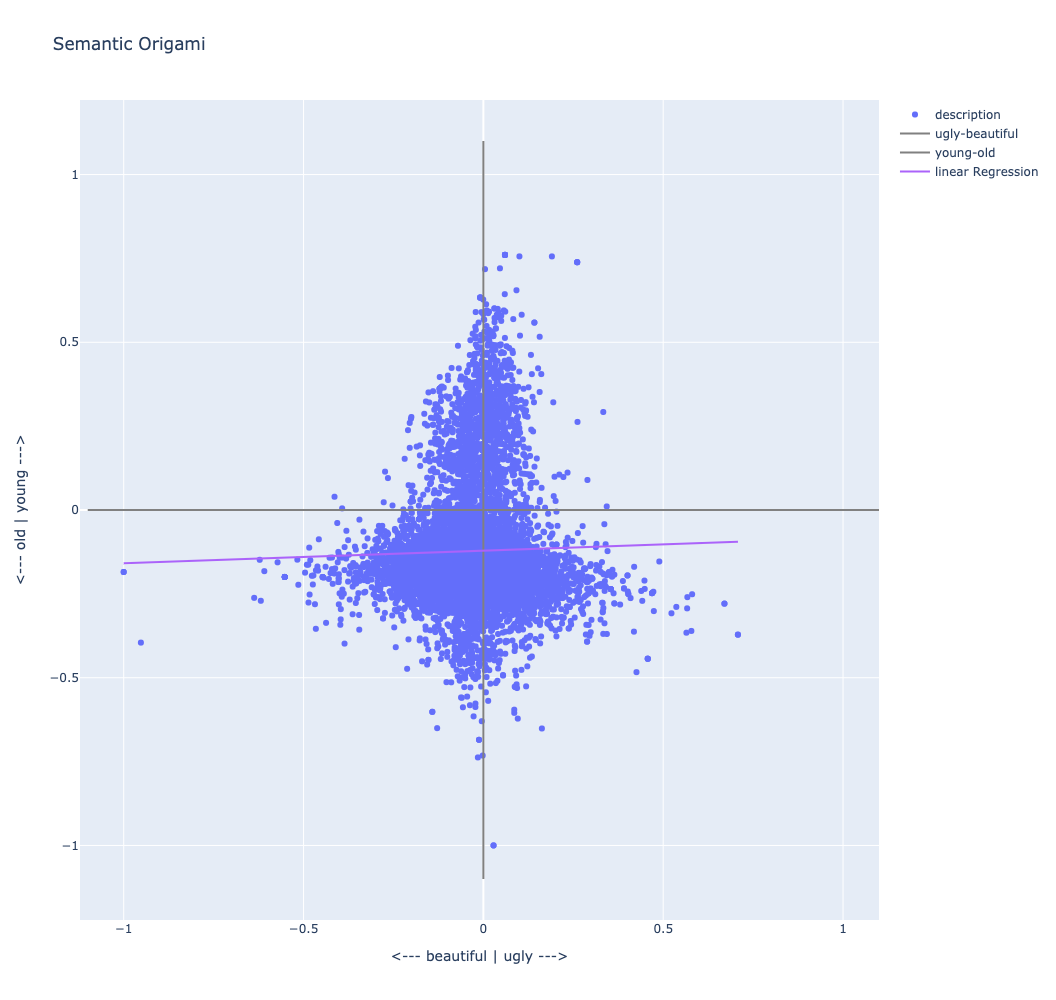

In [18]:
fig.show()

In [16]:
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objs as go
df = bourdieu.terms_embeddings
from sklearn.metrics.pairwise import cosine_distances

In [ ]:
projection_2 = None

if projection_2 is None:

    projection_1 = ['future', 'past']
    projection_str_1 = "-".join(projection_1)


    df_bert = bourdieu.compute_projection_embeddings(projection_1)
    df_proj = df_bert[projection_1]

    df_proj[projection_str_1] = df_proj[projection_1[0]] - df_proj[projection_1[1]]

    scaler = MinMaxScaler(feature_range=(-1, 1))
    df_proj["term"] = df_proj.index


    scaler = MinMaxScaler(feature_range=(-1, 1))
    df_proj[projection_str_1] = scaler.fit_transform(
        df_proj[projection_str_1].values.reshape(-1, 1)
    )
    
df_proj['project_angle'] = np.sqrt(1-df_proj[projection_str_1]**2) # Pythagore
df_proj['project_angle_random'] = df_proj['project_angle'].apply(lambda x: np.sqrt(1-x**2)*(1+random.random()*0.1))
df_proj['project_angle_random'] = df_proj['project_angle'].apply(lambda x:x*random.uniform(0, 1))

#df_proj['project_angle_random'] = df_proj['project_angle'].apply(lambda x: x*random.uniform(0, 1))

fig = go.Figure()

trace_1 = go.Scatter(
    x=[-1.0, 1.0],
    y=[0, 0],
    mode="lines",
    line_color="grey")


trace_2 = go.Scatter(
    x=[0, 0],
    y=[0, 1.0],
    mode="lines",
    line_color="grey")

trace_scatter_random = go.Scatter(
    x=df_proj[projection_str_1],
    y=df_proj['project_angle_random'],
    text = df_proj['term'],
    mode="markers",
    name = 'projection_random')

'''
trace_scatter = go.Scatter(
    x=df_proj[projection_str_1],
    y=df_proj['project_angle'],
    text = df_proj['term'],
    mode="markers",
    name = 'projection')
fig.add_trace(trace_scatter)

'''
# Get the barometer

baro_mean = df_proj[projection_str_1].mean()
baro_mean_angle =  np.sqrt(1-baro_mean**2)

trace_barometer = go.Scatter(
        x=[0.0, baro_mean, None],
        y=[0.0, baro_mean_angle, None],
        mode="lines",
        line_width = 3,
        line_color = 'royalblue',
        name = 'barometer')

fig.add_trace(trace_scatter_random)
fig.add_trace(trace_1)
fig.add_trace(trace_2)
fig.add_trace(trace_barometer)



fig.update_layout(
        title='Semantic PCA',
        height=500,
        width=1000,
        xaxis_title="<--- " + " | ".join(reversed(projection_1)) + " --->",
    )

fig.show()

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
2**3

8

In [22]:
 df_proj[projection_str_1]

new york         -0.155047
high school      -0.344438
young woman      -0.236750
young man        -0.260264
world war        -0.129923
                    ...   
triangle forms   -0.166219
future            0.741022
past             -1.000000
woman            -0.307677
man              -0.356220
Name: future-past, Length: 3004, dtype: float32

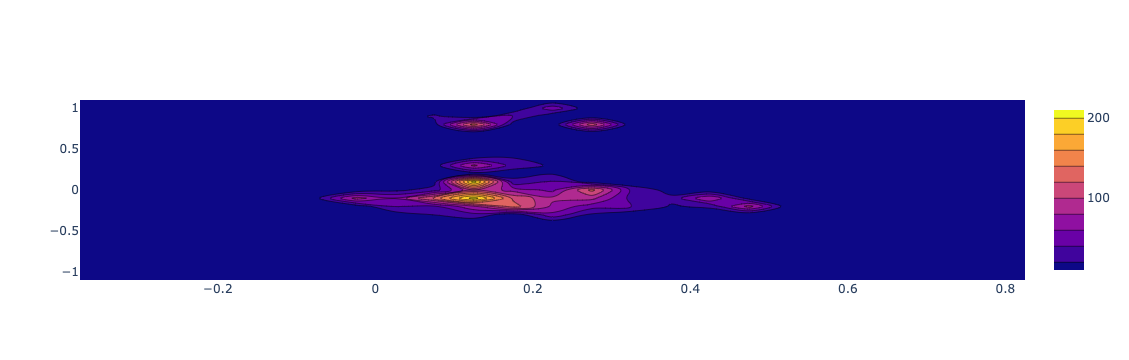

In [28]:
fig = go.Figure()


main_trace = go.Histogram2dContour(
        x = test["praise-criticism"],
        y = test["young-old"]
)

fig.add_trace(main_trace)


fig.show()